In [ ]:
# Import Libraries
import torch # This is PyTorch, the deep learning library we'll be using

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load in the dataset
data = pd.read_csv("https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/ml_sampledata.csv")

# Examine the first few rows
data.head()

,x,y
0,-2.000000,9.723762
1,-1.918367,9.161136
2,-1.836735,5.535378
3,-1.755102,6.802349
4,-1.673469,4.800206


In [ ]:
x = torch.tensor(data["x"])
y = torch.tensor(data["y"])

In [ ]:
# Define a model
def quad(w, x):
    return w[0]*x.pow(2) + w[1]*x + w[2]

# Define a loss function
def loss(y, yhat):
    return (y-yhat).pow(2).mean()

In [ ]:
# Step 1: Randomly Initialize Parameters
w = torch.rand(3)

# Additional setup: tell PyTorch we're going to
# need the slope of the loss with respect to these:

# These two lines are roughly equivalent
w.requires_grad_()    # Changes a "in-place"
#w = w.requires_grad() # Makes a copy of a

#Initialize list of losses

losses = []

In [ ]:
for epoch in range(500):
    # Step 2
    # Update the parameters in the following way:
    # w = w - lambda * grad(loss in direction of w)

    yhat = quad(w, x)
    J = loss(y, yhat)
    losses.append(float(J)) #J is a tensor as of now, this unwraps it into being a float

    # Please give me the slopes of J
    J.backward()

    lr = 0.001

    #When the learning rate is too large, the loss will increase over time



    # Change a b and c as noted above

    # This means:
    # "Hey PyTorch, please don't try and update the slopes
    # While I'm doing this calculation!"
    with torch.no_grad():
        w.sub_(lr * w.grad)
        #w = w.sub(lr * w.grad)
        # w = w - lr*w.grad

    #print(epoch, J)

    #Loss measures how bad the model is... machine learning tries ot make the losss smaller

        # This is just due to a weird quirk of PyTorch
    # When you do J.backward(), it ADDS the new slope to the old one
    w.grad.data.zero_()



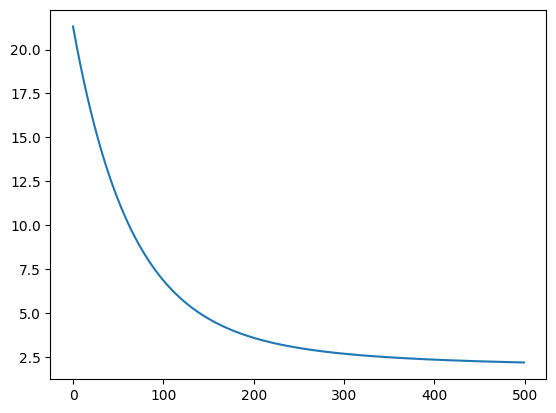

In [ ]:
plt.plot(losses) #shows that as we train, the loss goes down

#improves rapidly

In [ ]:
w.detach_()

tensor([2.9431, 2.0504, 1.0700])

In [ ]:

w.detach_()
plt.plot(x,y,".k")
plt.plot(x,quad(w,x),'-b')

NameError: name 'w' is not defined

In [ ]:
# This is how J changes as I change a
# a.grad = dJ/da
# a.grad = slope of J (as I change a)
a.grad

NameError: name 'a' is not defined

In [ ]:
%%timeit

# Add 10,000 random numbers using PyTorch functions
nums = torch.rand(10000).sum()

95.6 µs ± 25.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%%timeit

# Add 10,000 random numbers using a for loop in Python
nums = 0
for i in range(10000):
    nums = nums + torch.rand(1)

67.4 ms ± 4.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
